In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

: 

In [ ]:
#!pip install git+https://github.com/omarcastano/MasterThesis.git

In [ ]:
#!cp -r '/content/drive/MyDrive/Maestria/Datasets/LabelsGeoTiffv2.7z' /content
#!7z x "/content/LabelsGeoTiffv2.7z"
#!cp -r '/content/drive/MyDrive/Maestria/Datasets/Dataset.7z' /content
#!7z x "/content/Dataset.7z"

In [1]:
import os
import pandas as pd

from MasterThesis.classification.dataset import CustomDataset
from MasterThesis.classification.utils import visualize_augmented_images, generate_metadata_train_test_stratified_cv
from MasterThesis.trainer import Trainer
from sklearn.model_selection import train_test_split

# import wandB
import wandb

# wandb.login(key="ed6b4f7a25cd803c9ce7a66dbfba2353fe5bb5d2")
wandb.login(key="3dfb06e1099f6465f340f29f3fbd268fac8216e2")
os.environ["WANDB_SILENT"] = "true"

In [2]:
drive_path = '/content/drive/MyDrive' 
drive_path = "/media/omar/storage/gdrive"

In [3]:
query = [
    "((legal_exclusions == 0) and (non_agricultural == 1) and (agricultural_frontier == 0)) "
    "| ((legal_exclusions == 0) and (non_agricultural == 0) and (agricultural_frontier == 1))"
]
# "| ((legal_exclusions == 1) and (non_agricultural == 0) and (agricultural_frontier == 0))"]

In [4]:
select_classes = ["non_agricultural", "agricultural_frontier"]  # ["non_agricultural", "legal_exclusions", "agricultural_frontier"] #

In [5]:
# Load metadata
path_to_metadata = f"{drive_path}/Maestria/Datasets/GeoDataset/metadata_v2/metadata.csv"
metadata = pd.read_csv(path_to_metadata).sample(frac=0.7, random_state=42)
metadata = metadata.query(query[0])
metadata["Classes"] = metadata[select_classes].idxmax(axis=1)
metadata["Labels"] = metadata.Classes.map({k:i for i, k in enumerate(select_classes)})

print(metadata.shape)
metadata.head()

(11777, 12)


,Id,Elevation,Image,Mask,non_agricultural(km2),agricultural_frontier(km2),legal_exclusions(km2),non_agricultural,legal_exclusions,agricultural_frontier,Classes,Labels
11740,181828300900132015,"18NUP/18NUP_2_8/(300, 900)/elevation.tif","18NUP/18NUP_2_8/(300, 900)/chip.npy","18NUP/18NUP_2_8/(300, 900)/mask.tif",0.0,1.0,0.0,0,0,1,agricultural_frontier,1
36419,181833100800132212,"18NWM/18NWM_3_3/(100, 800)/elevation.tif","18NWM/18NWM_3_3/(100, 800)/chip.npy","18NWM/18NWM_3_3/(100, 800)/mask.tif",0.0,1.0,0.0,0,0,1,agricultural_frontier,1
28260,181863500900132113,"18NVN/18NVN_6_3/(500, 900)/elevation.tif","18NVN/18NVN_6_3/(500, 900)/chip.npy","18NVN/18NVN_6_3/(500, 900)/mask.tif",0.0,1.0,0.0,0,0,1,agricultural_frontier,1
16530,181800200900132111,"18NVL/18NVL_0_0/(200, 900)/elevation.tif","18NVL/18NVL_0_0/(200, 900)/chip.npy","18NVL/18NVL_0_0/(200, 900)/mask.tif",1.0,0.0,0.0,1,0,0,non_agricultural,0
51199,181891800400152016,"18PUQ/18PUQ_9_1/(800, 400)/elevation.tif","18PUQ/18PUQ_9_1/(800, 400)/chip.npy","18PUQ/18PUQ_9_1/(800, 400)/mask.tif",0.0,1.0,0.0,0,0,1,agricultural_frontier,1


In [6]:
#path to image and masks
path_to_images = f'{drive_path}/Maestria/Datasets/GeoDataset/Dataset/'

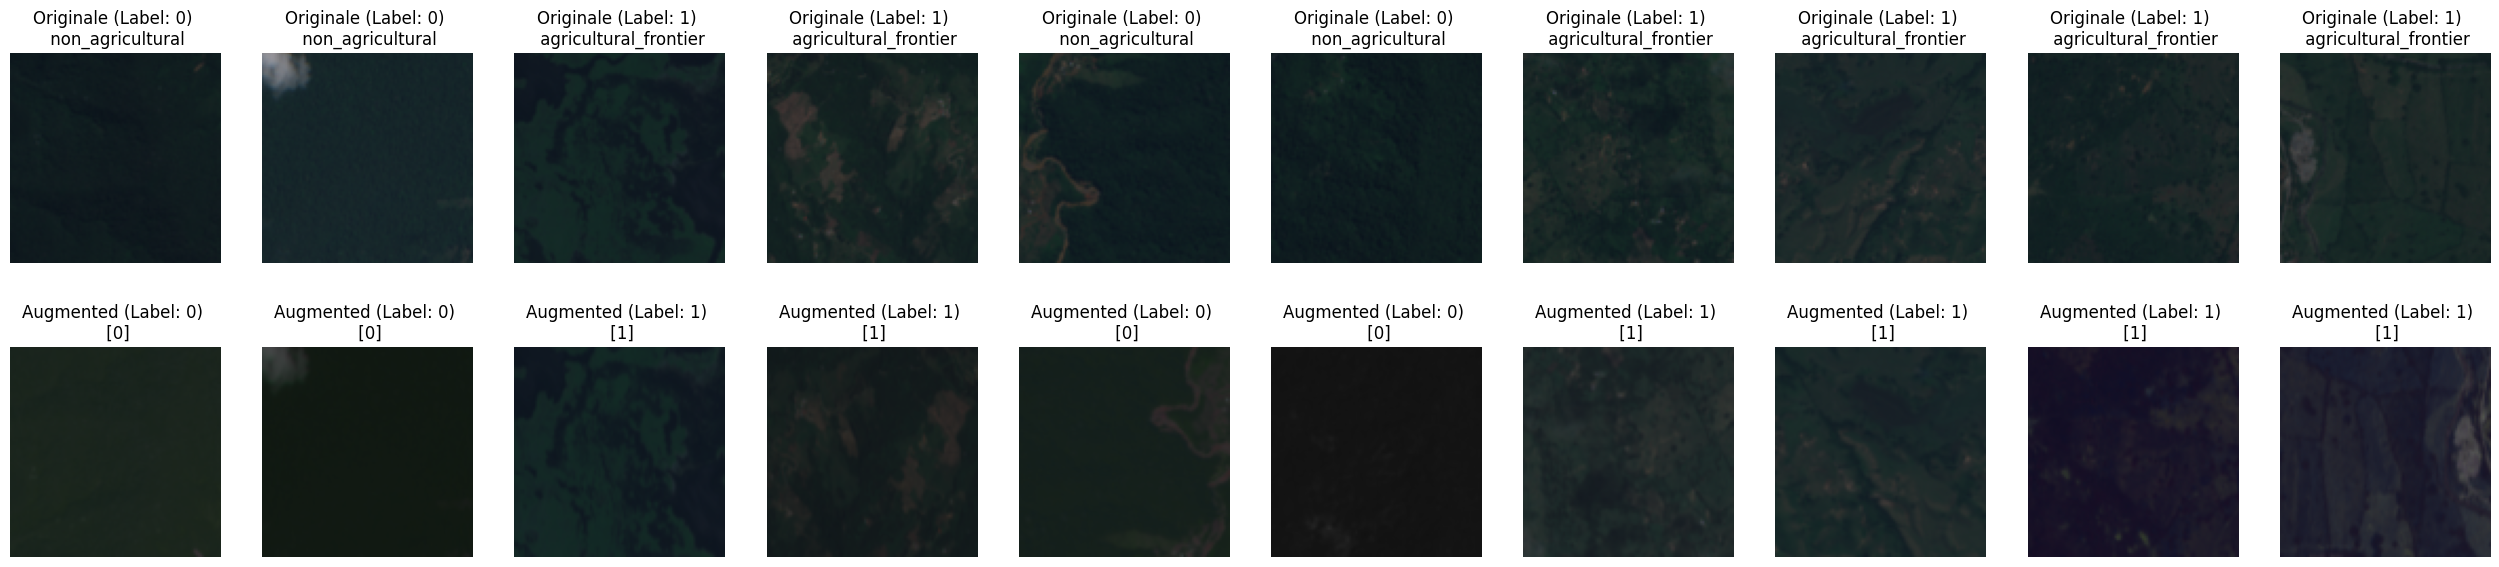

In [7]:
augment = {
    "horizontal_flip_prob": 0.5,
    "vertical_flip_prob": 0.5,
    "resize_scale": (0.8, 1.0),
    "resize_prob": 1.0,
    "brightness": 0.4,
    "contrast": 0.4,
    "saturation": 0.4,
    "hue": 0.2,
    "color_jitter_prob": 0.5,
    "gray_scale_prob": 0.2,
}

ds = CustomDataset(path_to_images, metadata.sample(10), return_original=True, augment=augment)
visualize_augmented_images(ds, class_names=select_classes, brightness=0.0)

In [8]:
path_to_save_model = f"{drive_path}/Maestria/Theses/pruebas/models/resnet18"

In [9]:
metadata_train, metadata_test, metadata_valid = generate_metadata_train_test_stratified_cv(metadata, train_size=10, n_split=4)

Number fo total images : 11777
Number of images to train: 10, 0.08499999999999999%
Number of images to test: 2944, 24.998%
Number of images to valid: 2944, 24.998%


In [ ]:
path_to_save_model = f"{drive_path}Maestria/pruebas/models/resnet18"
path_to_load_backbone_simclr = f"{drive_path}Maestria/Theses/SSL/SimCLR/models/resnet18/model_SSL-SimCLR-v2.pth"
path_to_load_backbone_elevation_simclr = f"{drive_path}Maestria/Theses/SSL/ElevationSSL/models/resnet18/Elevation-SimCLR/model_SimCLR-Elevation.pth"
path_to_load_backbone_elevation = f"{drive_path}Maestria/Theses/SSL/ElevationSSL/models/resnet18/Elevation/model_Elevation.pth"

In [11]:
augment = {
    "horizontal_flip_prob": 0.5,
    "vertical_flip_prob": 0.5,
    "resize_scale": (0.8, 1.0),
    "resize_prob": 1.0,
    "brightness": 0.1,
    "contrast": 0.1,
    "saturation": 0.1,
    "hue": 0.1,
    "color_jitter_prob": 0.2,
    "gray_scale_prob": 0.2,
}

In [12]:
def run_experiment(
    train_size,
    epochs,
    pretrained=False,
    version="RandomInit",
    path_to_load_backbone=None,
    fine_tune=False,
    ft_epoch=30,
    project="CLF-2_classes",
    train_batch_size=8,
):

    metadata_train, metadata_test, metadata_valid = generate_metadata_train_test_stratified_cv(metadata, train_size=train_size, n_split=5)

    hypm_kwargs = {
        "version": version,
        "model_name": "Classifier",
        "amount_of_ft_data": metadata_train[1].shape[0],
        "backbone": "resnet18",
        "pretrained": pretrained,
        "fine_tune": fine_tune,
        "ft_epoch": ft_epoch,
        "ft_lr": 0.000005,
        "in_channels": 3,
        "num_classes": 2,
        "class_names": select_classes,
        "normalizing_factor": 6000,
        "weight_decay": 0.00005,
        "learning_rate": 1e-3,
        "train_batch_size": train_batch_size,
        "test_batch_size": 128,
        "epochs": epochs,
        "augment_train": augment,
        "augment_test": None,
        "patient": 10,
        "eval_epoch": 1,
    }

    wandb_kwargs = {
        "project": "CLF-2_classes",
        "entity": "omar-c",
        "id": None,
        "name": version,
        "resume": False,
    }

    for train, test, valid in zip(metadata_train, metadata_test, metadata_valid):
        metadata_kwargs = {
            "path_to_images": path_to_images,
            "path_to_save_model": None,  # path_to_save_model,  # Path to save the model that is being trained (do not include the extension .pt or .pth)
            "path_to_load_model": None,  # Path to load a model from a checkpoint (useful to handle notebook disconection)
            "path_to_load_backbone": path_to_load_backbone,
            "metadata_train": train,
            "metadata_test": test,
            "metadata_valid": valid,
            "num_workers": 6,
            "device": "cuda",
        }
        trainer = Trainer(CustomDataset, visualize_augmented_images, wandb_kwargs, hypm_kwargs, metadata_kwargs)
        trainer.configure_trainer()

        trainer.fit()

In [13]:
n_repeat_experiment = 1

In [ ]:
for i in range(n_repeat_experiment):
    for i in [10, 20]:

        # run_experiment(
        #     train_size=i,
        #     epochs=100,
        #     pretrained=False,
        #     version="RandomInit",
        #     path_to_load_backbone=None,
        #     fine_tune=False,
        #     ft_epoch=None,
        #     train_batch_size=5,
        # )

        # run_experiment(
        #    train_size=i,
        #    epochs=100,
        #    pretrained=True,
        #    version="SimCLR",
        #    path_to_load_backbone=path_to_load_backbone_simclr,
        #    fine_tune=True,
        #    ft_epoch=10,
        #    train_batch_size=5,
        # )

        run_experiment(
            train_size=i,
            epochs=100,
            pretrained=True,
            version="Elevation+SimCLR",
            path_to_load_backbone=path_to_load_backbone_elevation_simclr,
            fine_tune=True,
            ft_epoch=10,
            train_batch_size=5,
        )

        run_experiment(
            train_size=i,
            epochs=100,
            pretrained=True,
            version="Elevation",
            path_to_load_backbone=path_to_load_backbone_elevation,
            fine_tune=True,
            ft_epoch=10,
            train_batch_size=5,
        )

In [ ]:
for i in range(n_repeat_experiment):
    for i in [40, 80]:

        # run_experiment(
        #    train_size=i,
        #    epochs=100,
        #    pretrained=False,
        #    version="RandomInit",
        #    path_to_load_backbone=None,
        #    fine_tune=False,
        #    ft_epoch=None,
        #    train_batch_size=8,
        # )

        # run_experiment(
        #    train_size=i,
        #    epochs=100,
        #    pretrained=True,
        #    version="SimCLR",
        #    path_to_load_backbone=path_to_load_backbone_simclr,
        #    fine_tune=True,
        #    ft_epoch=10,
        #    train_batch_size=8,
        # )

        run_experiment(
            train_size=i,
            epochs=100,
            pretrained=True,
            version="Elevation+SimCLR",
            path_to_load_backbone=path_to_load_backbone_elevation_simclr,
            fine_tune=True,
            ft_epoch=10,
            train_batch_size=8,
        )

        run_experiment(
            train_size=i,
            epochs=100,
            pretrained=True,
            version="Elevation",
            path_to_load_backbone=path_to_load_backbone_elevation,
            fine_tune=True,
            ft_epoch=10,
            train_batch_size=8,
        )

In [ ]:
for i in range(n_repeat_experiment):
    for i in [100, 200]:

        # run_experiment(
        #     train_size=i,
        #     epochs=100,
        #     pretrained=False,
        #     version="RandomInit",
        #     path_to_load_backbone=None,
        #     project="CLF-2_classes",
        #     fine_tune=False,
        #     ft_epoch=None,
        #     train_batch_size=16,
        # )

        # run_experiment(
        #     train_size=i,
        #     epochs=100,
        #     pretrained=True,
        #     version="SimCLR",
        #     path_to_load_backbone=path_to_load_backbone_simclr,
        #     project="CLF-2_classes",
        #     fine_tune=True,
        #     ft_epoch=15,
        #     train_batch_size=16,
        # )

        run_experiment(
            train_size=i,
            epochs=100,
            pretrained=True,
            version="Elevation+SimCLR",
            path_to_load_backbone=path_to_load_backbone_elevation_simclr,
            project="CLF-2_classes",
            fine_tune=True,
            ft_epoch=15,
            train_batch_size=16,
        )

        run_experiment(
            train_size=i,
            epochs=100,
            pretrained=True,
            version="Elevation",
            path_to_load_backbone=path_to_load_backbone_elevation,
            project="CLF-2_classes",
            fine_tune=True,
            ft_epoch=15,
            train_batch_size=16,
        )

In [ ]:
for i in range(n_repeat_experiment):
    for i in [500, 1000]:

        # run_experiment(
        #     train_size=i,
        #     epochs=150,
        #     pretrained=False,
        #     version="RandomInit",
        #     path_to_load_backbone=None,
        #     project="CLF-2_classes",
        #     fine_tune=False,
        #     ft_epoch=None,
        #     train_batch_size=32,
        # )

        # run_experiment(
        #     train_size=i,
        #     epochs=150,
        #     pretrained=True,
        #     version="SimCLR",
        #     path_to_load_backbone=path_to_load_backbone_simclr,
        #     project="CLF-2_classes",
        #     fine_tune=True,
        #     ft_epoch=20,
        #     train_batch_size=32,
        # )

        run_experiment(
            train_size=i,
            epochs=150,
            pretrained=True,
            version="Elevation+SimCLR",
            path_to_load_backbone=path_to_load_backbone_elevation_simclr,
            project="CLF-2_classes",
            fine_tune=True,
            ft_epoch=20,
            train_batch_size=32,
        )

        run_experiment(
            train_size=i,
            epochs=150,
            pretrained=True,
            version="Elevation",
            path_to_load_backbone=path_to_load_backbone_elevation,
            project="CLF-2_classes",
            fine_tune=True,
            ft_epoch=20,
            train_batch_size=32,
        )

In [ ]:
for i in range(n_repeat_experiment):
    for i in [2000, 3000]:

        run_experiment(
            train_size=i,
            epochs=150,
            pretrained=False,
            version="RandomInit",
            path_to_load_backbone=None,
            project="CLF-2_classes",
            fine_tune=False,
            ft_epoch=None,
            train_batch_size=32,
        )

        run_experiment(
            train_size=i,
            epochs=150,
            pretrained=True,
            version="SimCLR",
            path_to_load_backbone=path_to_load_backbone_simclr,
            project="CLF-2_classes",
            fine_tune=True,
            ft_epoch=20,
            train_batch_size=32,
        )

        run_experiment(
            train_size=i,
            epochs=150,
            pretrained=True,
            version="Elevation+SimCLR",
            path_to_load_backbone=path_to_load_backbone_elevation_simclr,
            project="CLF-2_classes",
            fine_tune=True,
            ft_epoch=20,
            train_batch_size=32,
        )

        run_experiment(
            train_size=i,
            epochs=150,
            pretrained=True,
            version="Elevation",
            path_to_load_backbone=path_to_load_backbone_elevation,
            project="CLF-2_classes",
            fine_tune=True,
            ft_epoch=20,
            train_batch_size=32,
        )